**<font color = "darkred" size="5">ch13.데이터 시각화 - II</font>**

In [2]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.CodeMirror {font-family:Consolas; font-size:11pt;}
div.output {font-size:11pt;}
div.input {font-family:Consolas; font-size:11pt;}
div.prompt {min-width:70px;}
</style>
"""))

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

# 한글 설정 
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) # y축

# 경고 메시지 가리기 
import warnings
warnings.filterwarnings(action='ignore')

# 3. seaborn
- matplot을 기반으로 만든 고수준 그래픽 라이브러리
    - 공식사이트: https://seaborn.pydata.org/
    - API: https://seaborn.pydata.org/api.html <br><br>
- seaborn으로 그래프를 그리기 위한 단계
    - 1) 데이터 준비
    - 2) 미적 속성 설정
    - 3) 함수를 이용하여 그래프 그리기
    - 4) 그래프 출력, 저장 

## (1) 데이터 준비

In [5]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.shape

(150, 5)

In [6]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [8]:
iris.info() # 결측치를 제외한 갯수, dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
iris.isnull().sum() # 결측치 수 

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
iris.describe(exclude='float64')

,species
count,150
unique,3
top,virginica
freq,50


In [14]:
# R패키지의 데이터셋 가져오기 (Titanic)
import statsmodels.api as sm
r_titanic = sm.datasets.get_rdataset('Titanic', package='datasets').data
r_titanic.head()

,Class,Sex,Age,Survived,Freq
0,1st,Male,Child,No,0
1,2nd,Male,Child,No,0
2,3rd,Male,Child,No,35
3,Crew,Male,Child,No,0
4,1st,Female,Child,No,0


In [15]:
titanic = sns.load_dataset('titanic')
titanic.head()
# survived 생존여부, pclass 티켓클래스1,2,3등석, 
# sibsp(함께 탑승한 형제와 배우자수)
# parch(함께 탑승한 부모, 아이수) fare(탑승료)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [16]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


## (2) 미적 속성 설정

### 1) 스타일 지정

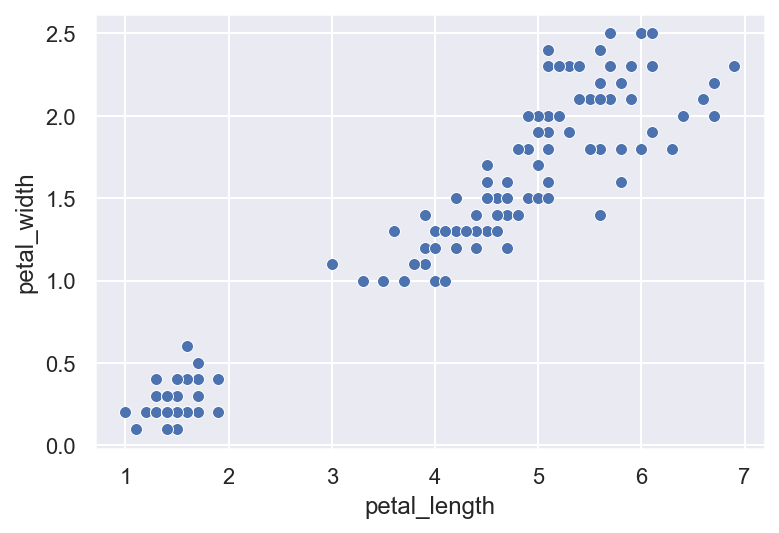

In [22]:
# style = white(기본), darkgrid, whitegrid, dark ... 
sns.set(style='darkgrid')
ax = sns.scatterplot(x='petal_length', y='petal_width', data=iris)

###  2) 컬러 팔레트 

https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
https://matplotlib.org/tutorials/colors/colormaps.html
https://seaborn.pydata.org/tutorial/color_palettes.html
http://hleecaster.com/wp-content/uploads/2019/12/article2_image9.png

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

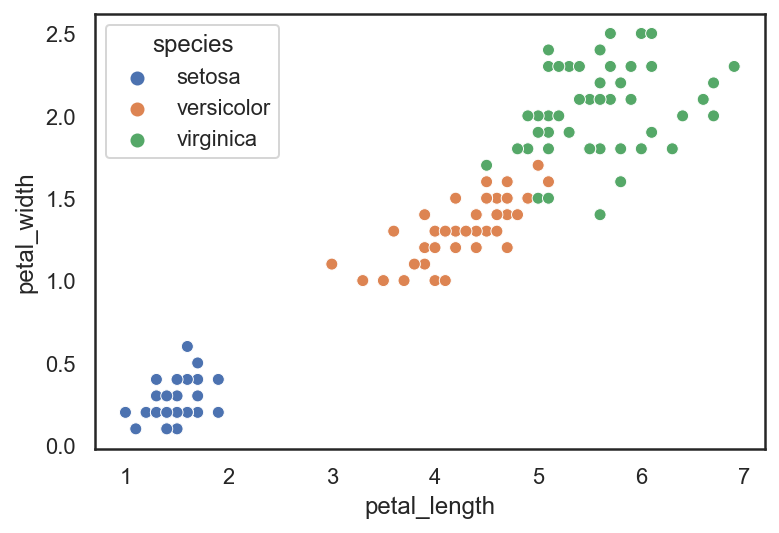

In [24]:
# palette: bright/deep/muted/paste/color blind/etc...
sns.set(palette='deep', style='white')
sns.scatterplot(x='petal_length', y='petal_width',
               data=iris, hue='species')

### 3) 컨텍스트(비율) 지정

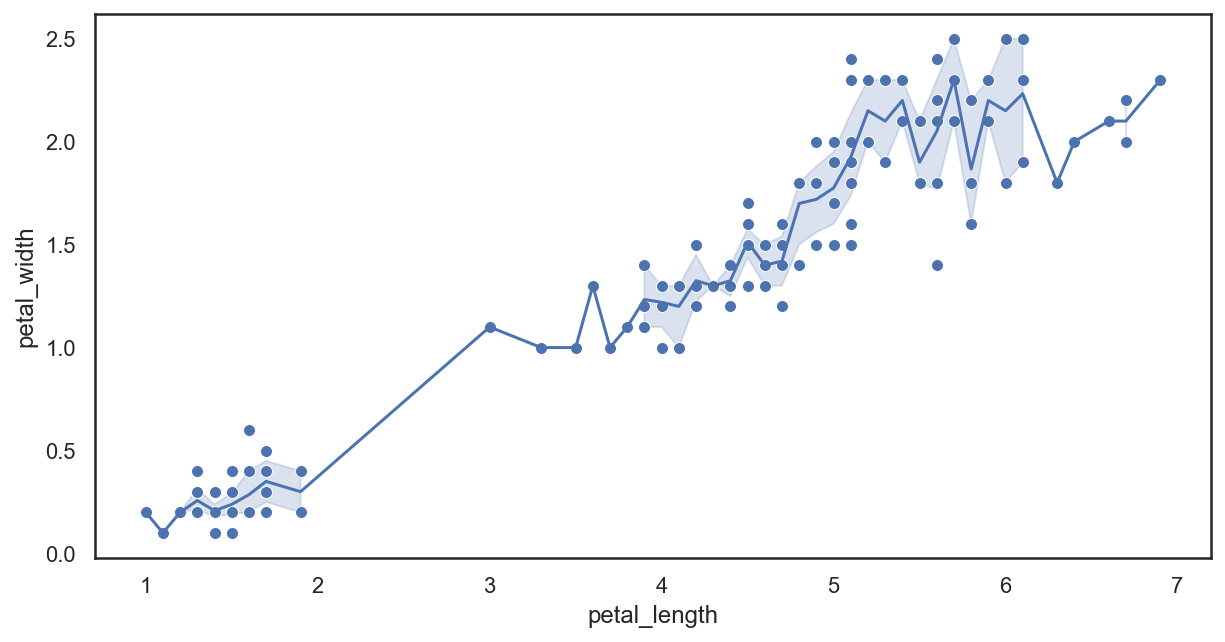

In [25]:
plt.figure(figsize=(10,5))

# context: notebook(default,1배율)/paper(0.8)/talk(1.3)/poster(1.8)
sns.lineplot(x='petal_length', y='petal_width', data=iris)
sns.scatterplot(x='petal_length', y='petal_width', data=iris)

plt.show()

## (3) seaborn함수로 그래프 그리기
### 1) Relational plots(관계형 그래프)

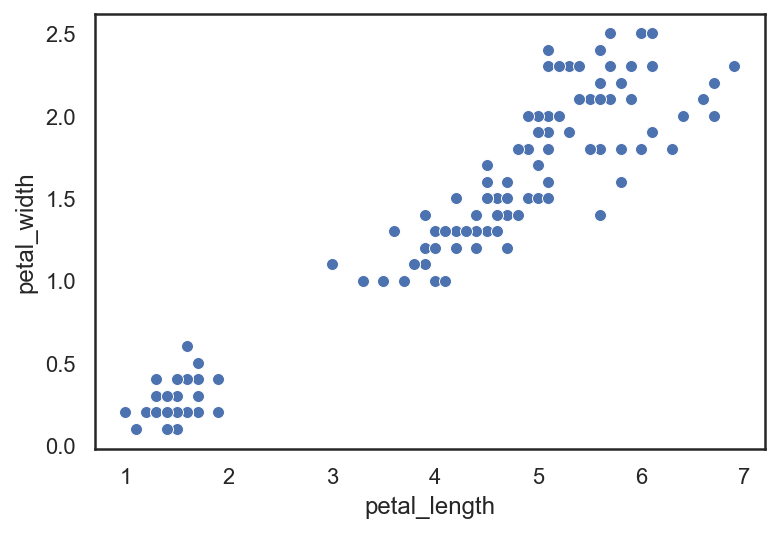

In [26]:
sns.scatterplot(x='petal_length', y='petal_width', data=iris)
plt.show()

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

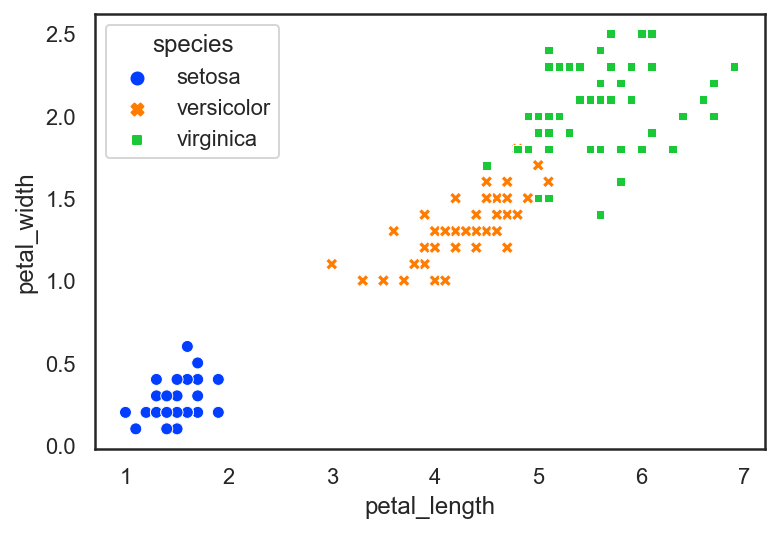

In [27]:
# hue 속성에 그룹변수를 넣어 그룹화하여 그룹별 다른 색상, 다른 style 지정 
sns.scatterplot(data=iris, x='petal_length', y='petal_width',
                hue='species', palette='bright', style='species')

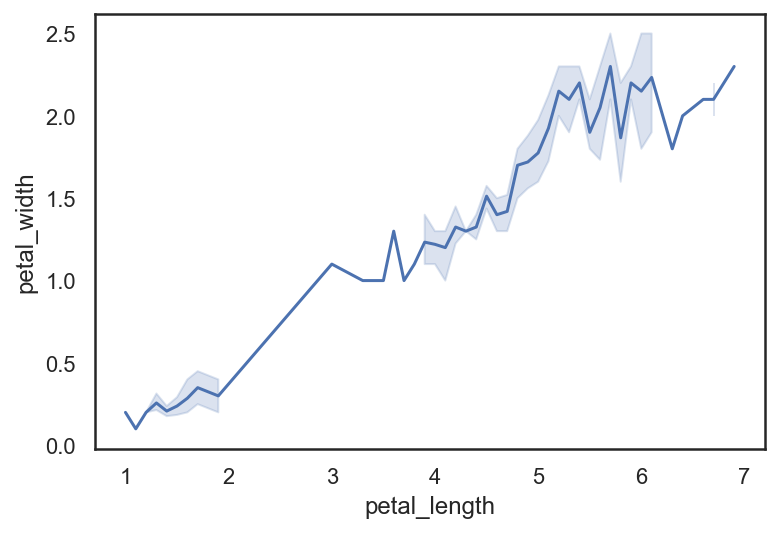

In [28]:
sns.lineplot(x='petal_length', y='petal_width', data=iris)
plt.show()

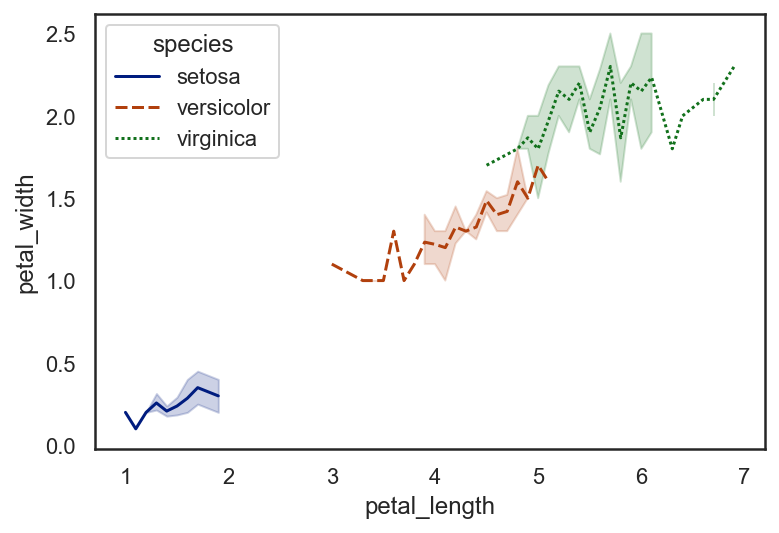

In [29]:
sns.lineplot(x='petal_length', y='petal_width', data=iris,
             hue='species', style='species', palette='dark')
plt.show()

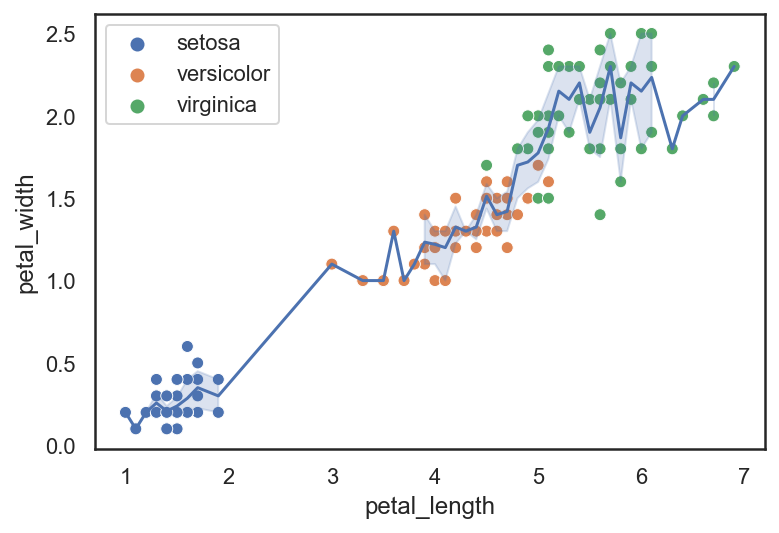

In [30]:
sns.scatterplot(x='petal_length', y='petal_width', 
                data=iris, hue='species')
sns.lineplot(x='petal_length', y='petal_width', data=iris)

plt.show()

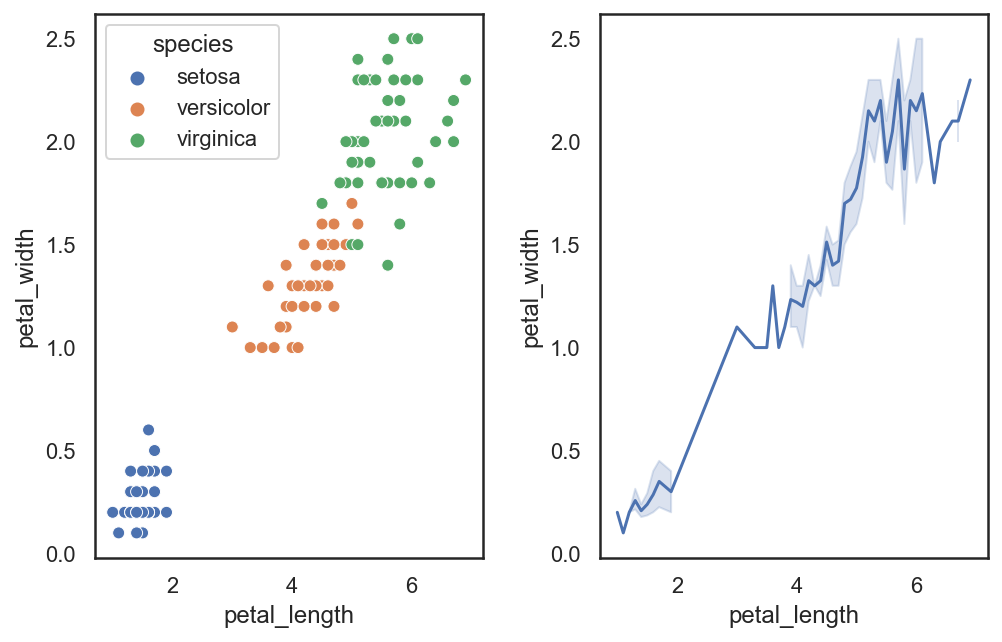

In [31]:
fig, axes = plt.subplots(ncols=2, figsize=(8,5))
plt.subplots_adjust(wspace=0.3)
sns.scatterplot(x='petal_length', y='petal_width', data=iris,
                hue='species', ax=axes[0])
sns.lineplot(x='petal_length', y='petal_width',
             data=iris, ax=axes[1])
plt.show()

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

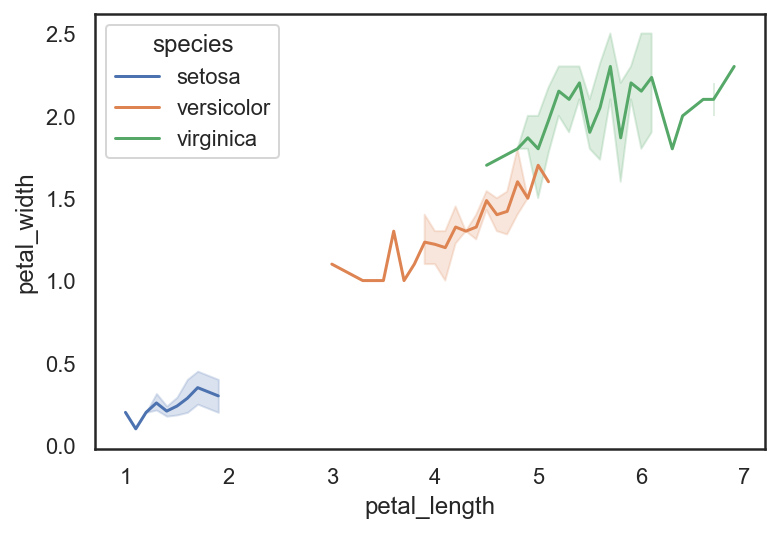

In [32]:
sns.lineplot(x='petal_length', y='petal_width',
             data=iris, hue='species')

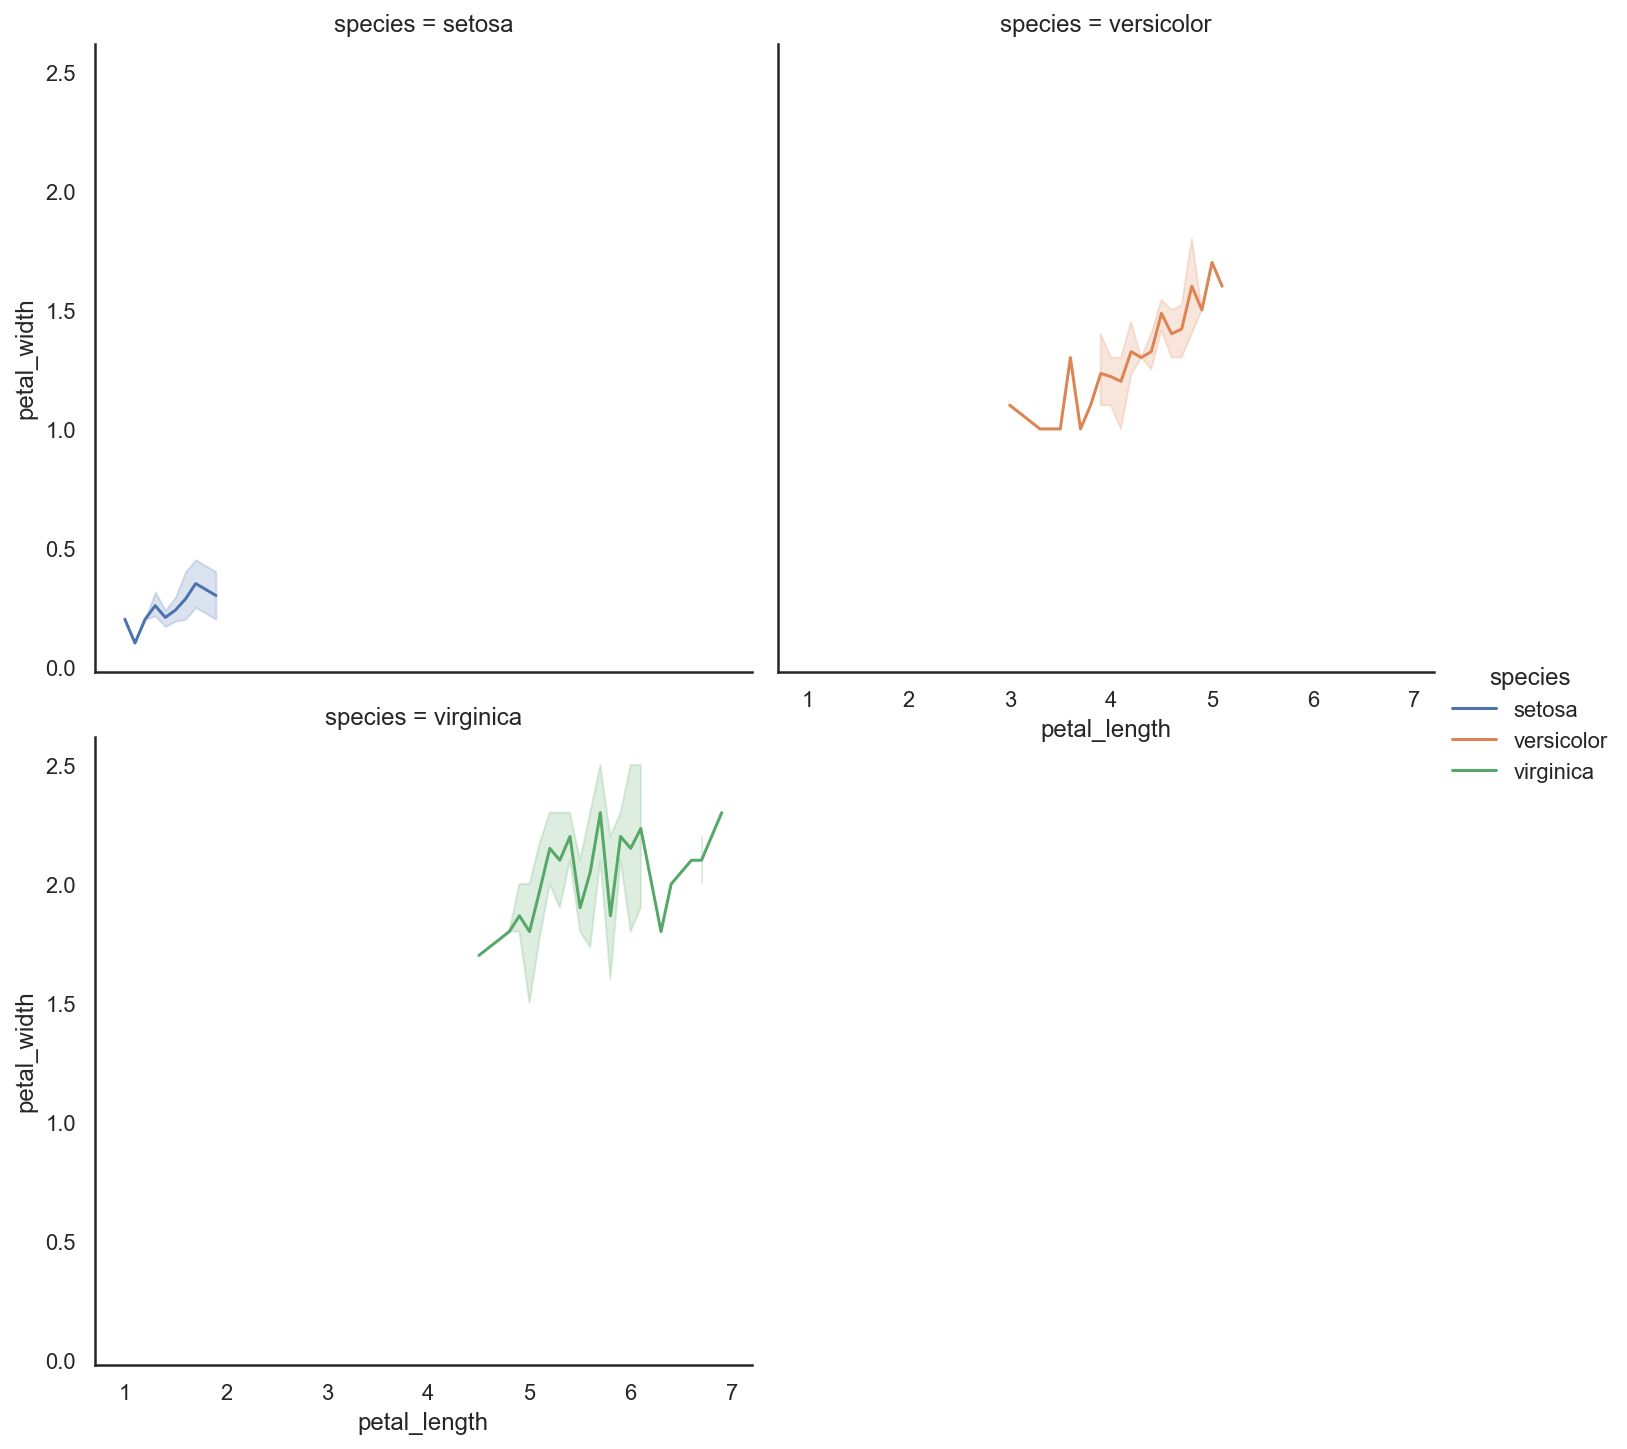

In [33]:
# lineplot을 서브플롯으로 표현하기: relplot
ax = sns.relplot(x='petal_length', y='petal_width',
                 data=iris, hue='species',
                 kind='line', # default: scatter
                 col='species', # col단위로 서브플롯 표현
                 col_wrap=2) # 한 줄에 표현될 서브플롯 수

### 2) categorical plots(범주형 그래프)

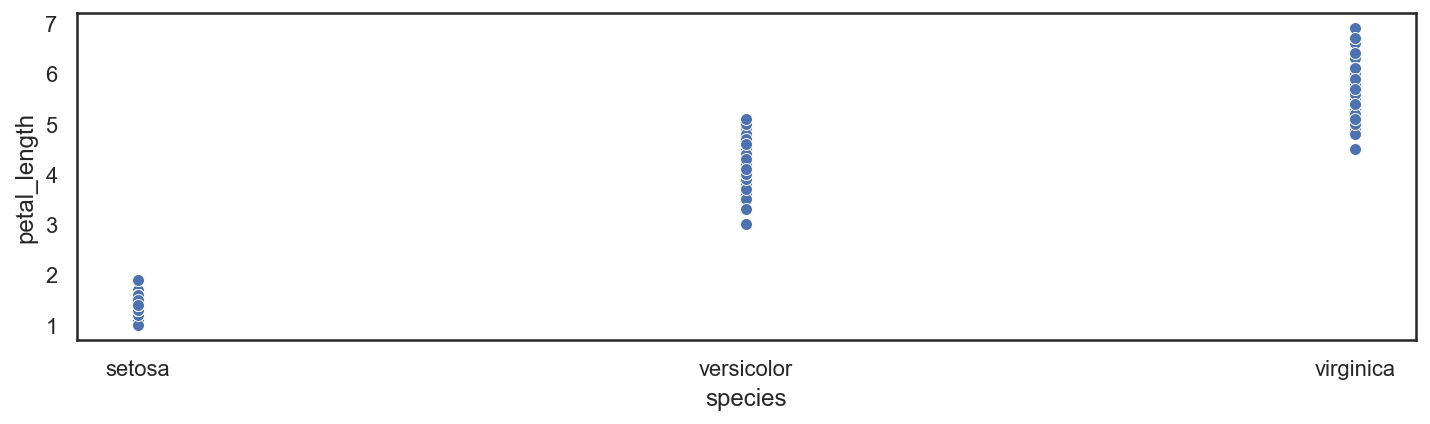

In [34]:
# x축이 범주형 데이터일 경우 scatterplot은 적합하지 않다.
plt.figure(figsize=(12,3))
ax = sns.scatterplot(x='species', y='petal_length', data=iris)

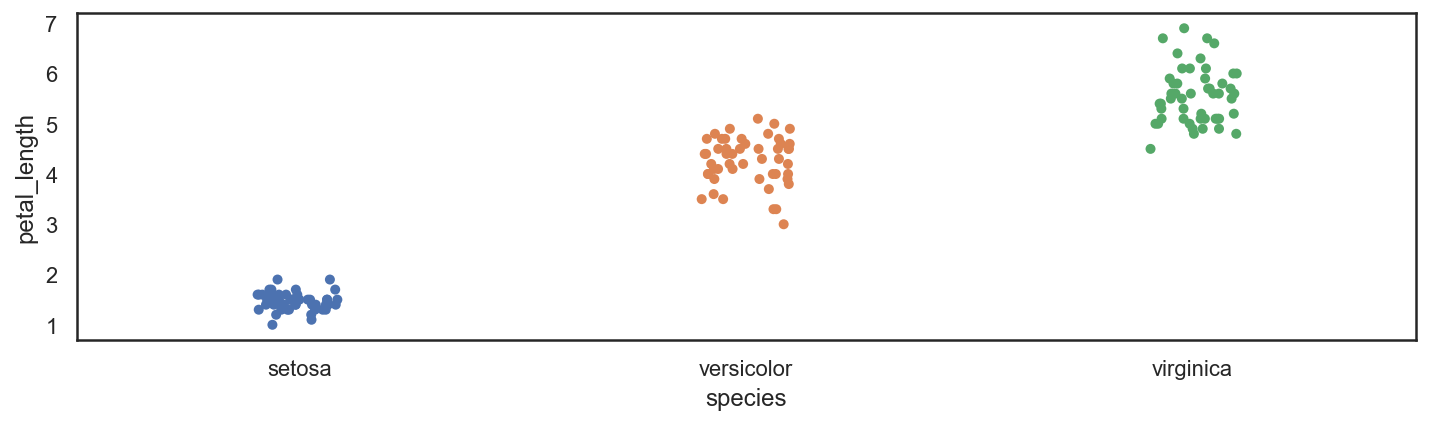

In [35]:
# x축이 범주형일 때 쓰는 산점도 1: stripplot
plt.figure(figsize=(12,3))
ax = sns.stripplot(x='species', y='petal_length', data=iris)

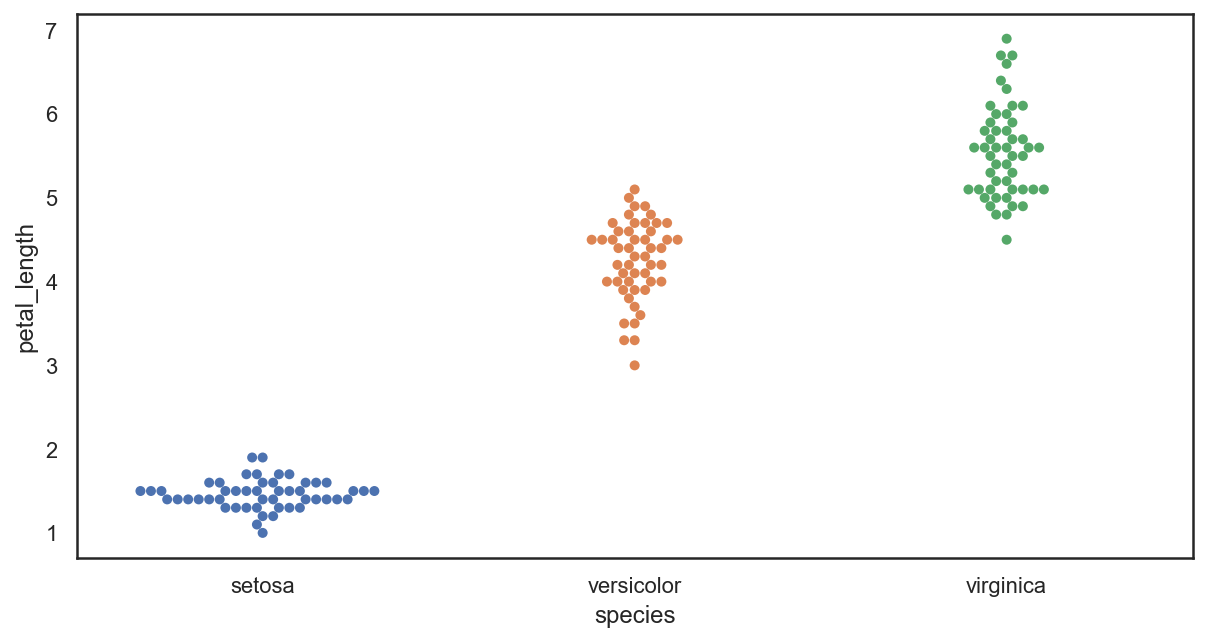

In [36]:
# x축이 범주형일 때 쓰는 산점도 2: swarmplot(중첩되지 않도록 표시)
plt.figure(figsize=(10,5))
ax = sns.swarmplot(x='species', y='petal_length', data=iris)

In [37]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


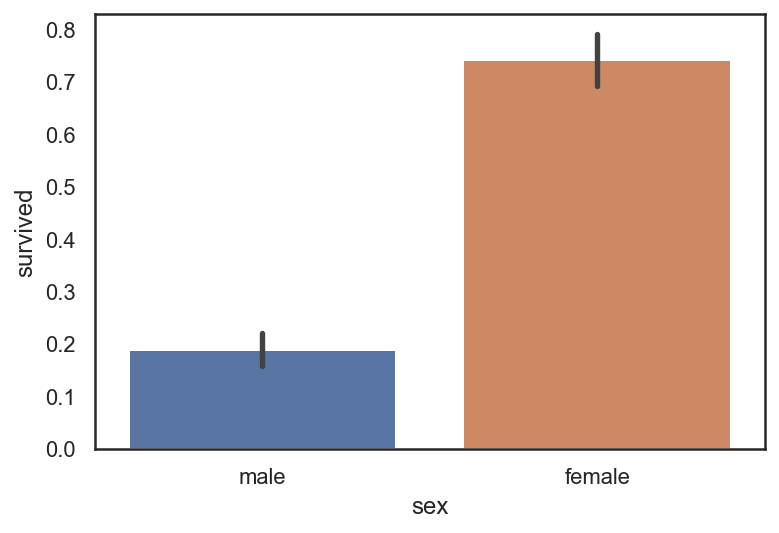

In [38]:
# 성별 생존률의 평균을 막대그래프료 
a = sns.barplot(x='sex', y='survived', data=titanic)

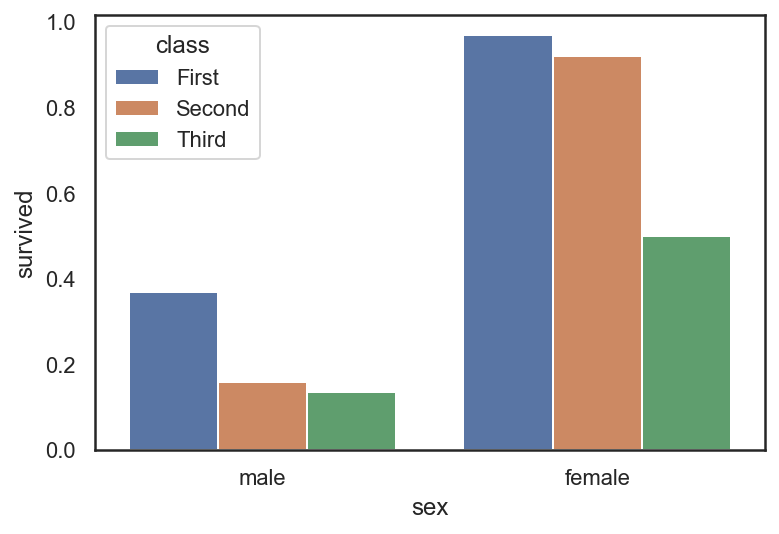

In [39]:
# 성별 생존률의 평균을 class별로 표시 
a = sns.barplot(x='sex', y='survived', data=titanic,
                hue='class', ci=None)

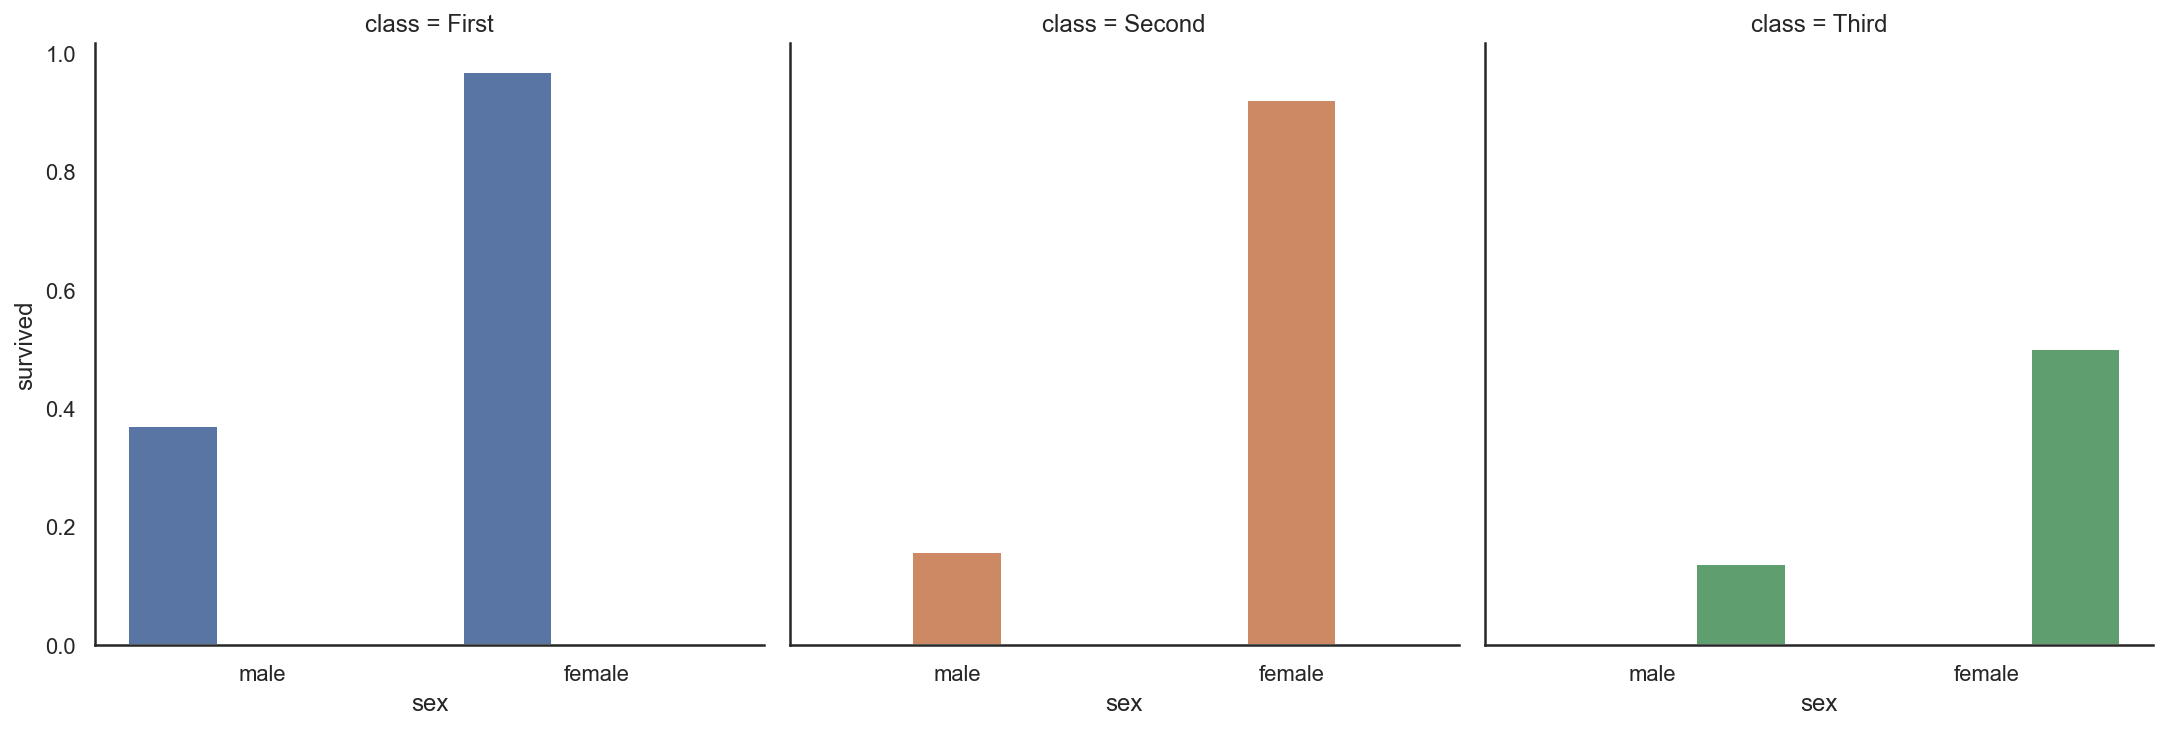

In [40]:
# barplot을 서브플롯으로: catplot
a = sns.catplot(x='sex', y='survived', data=titanic,
                hue='class', ci=None, kind='bar', col='class')

<AxesSubplot:xlabel='deck', ylabel='count'>

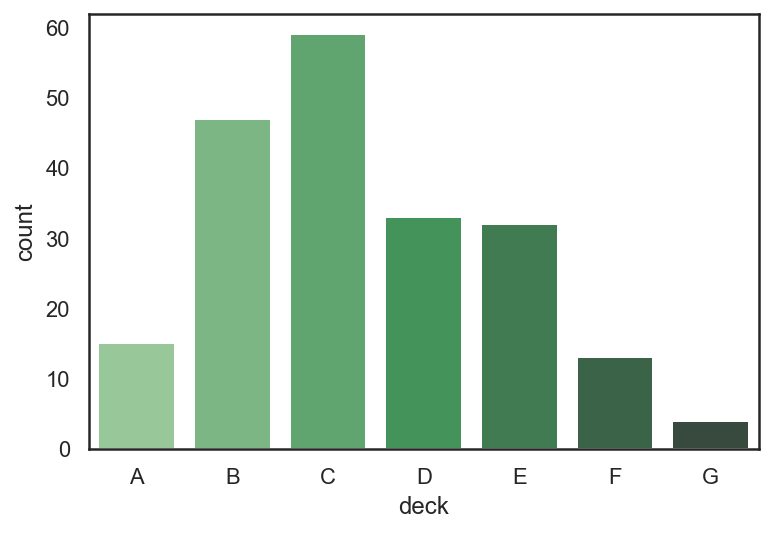

In [41]:
# deck별 관측수를 막대그래프로 
sns.countplot(x='deck', data=titanic, palette='Greens_d')

<AxesSubplot:xlabel='class', ylabel='survived'>

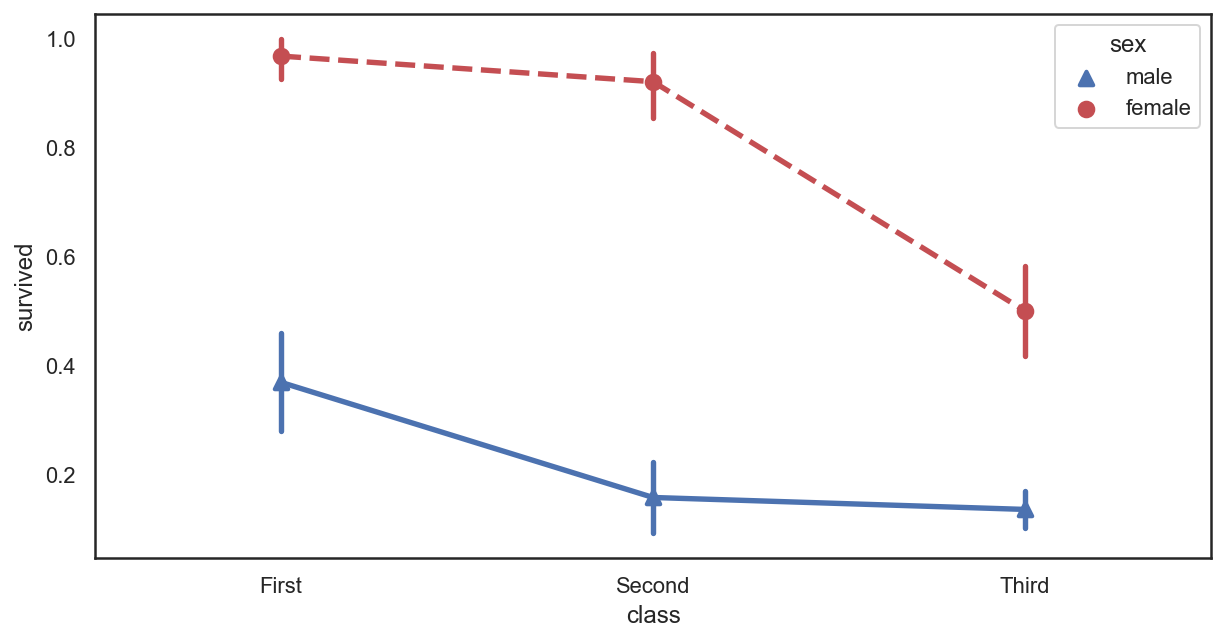

In [42]:
# class별 생존률을 성별로 pointplot
plt.figure(figsize=(10,5))
sns.pointplot(x='class', y='survived', hue='sex', data=titanic,
              palette={'male':'b', 'female':'r'},
              markers=['^', 'o'],
              linestyles=['-', '--'])

https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot

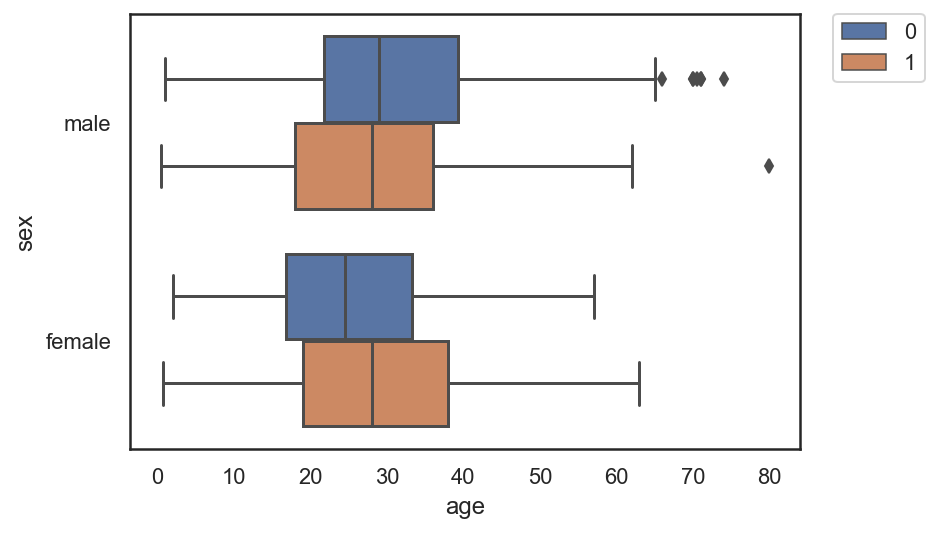

In [44]:
# botplot, violinplot, boxenplot
sns.boxplot(y='sex', x='age', data=titanic, hue='survived')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

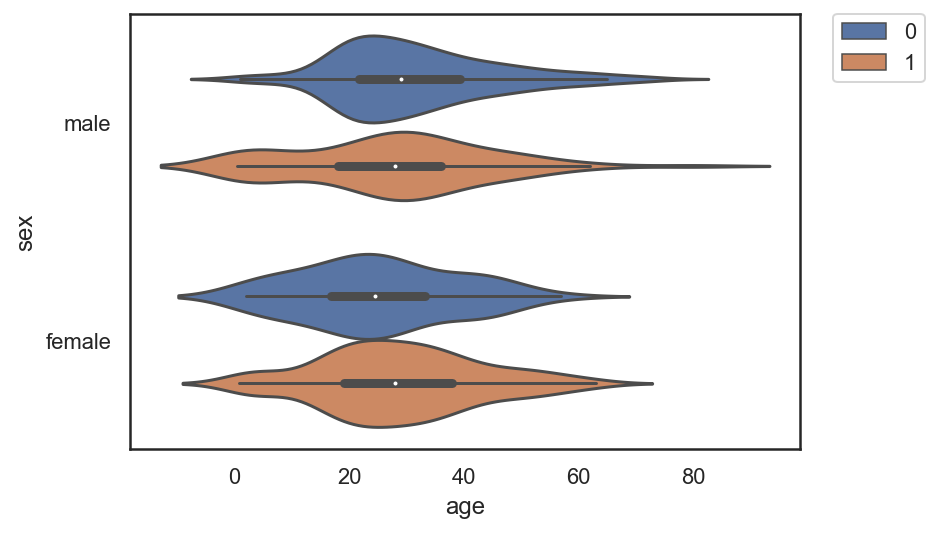

In [45]:
sns.violinplot(y='sex', x='age', data=titanic, hue='survived')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

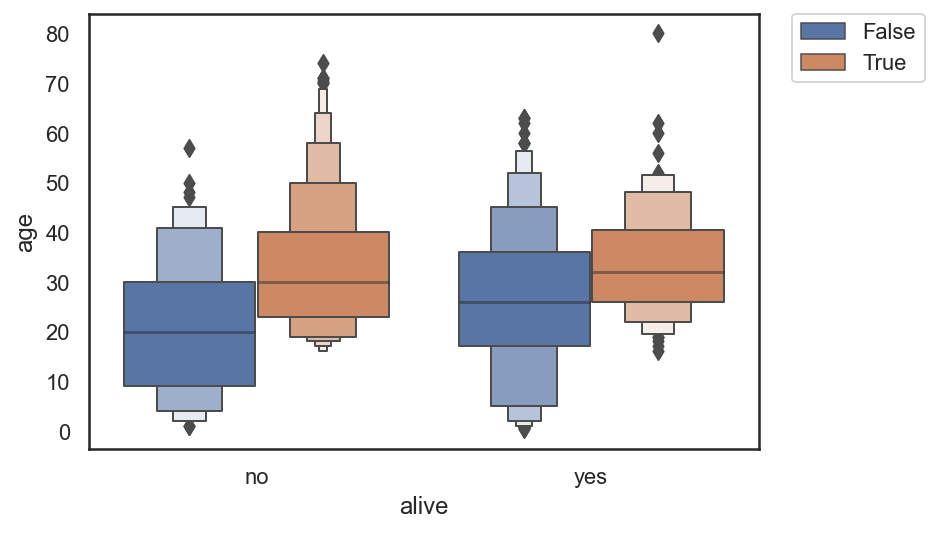

In [46]:
sns.boxenplot(x='alive', y='age', data=titanic, hue='adult_male')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### 3) 쌍관계그래프

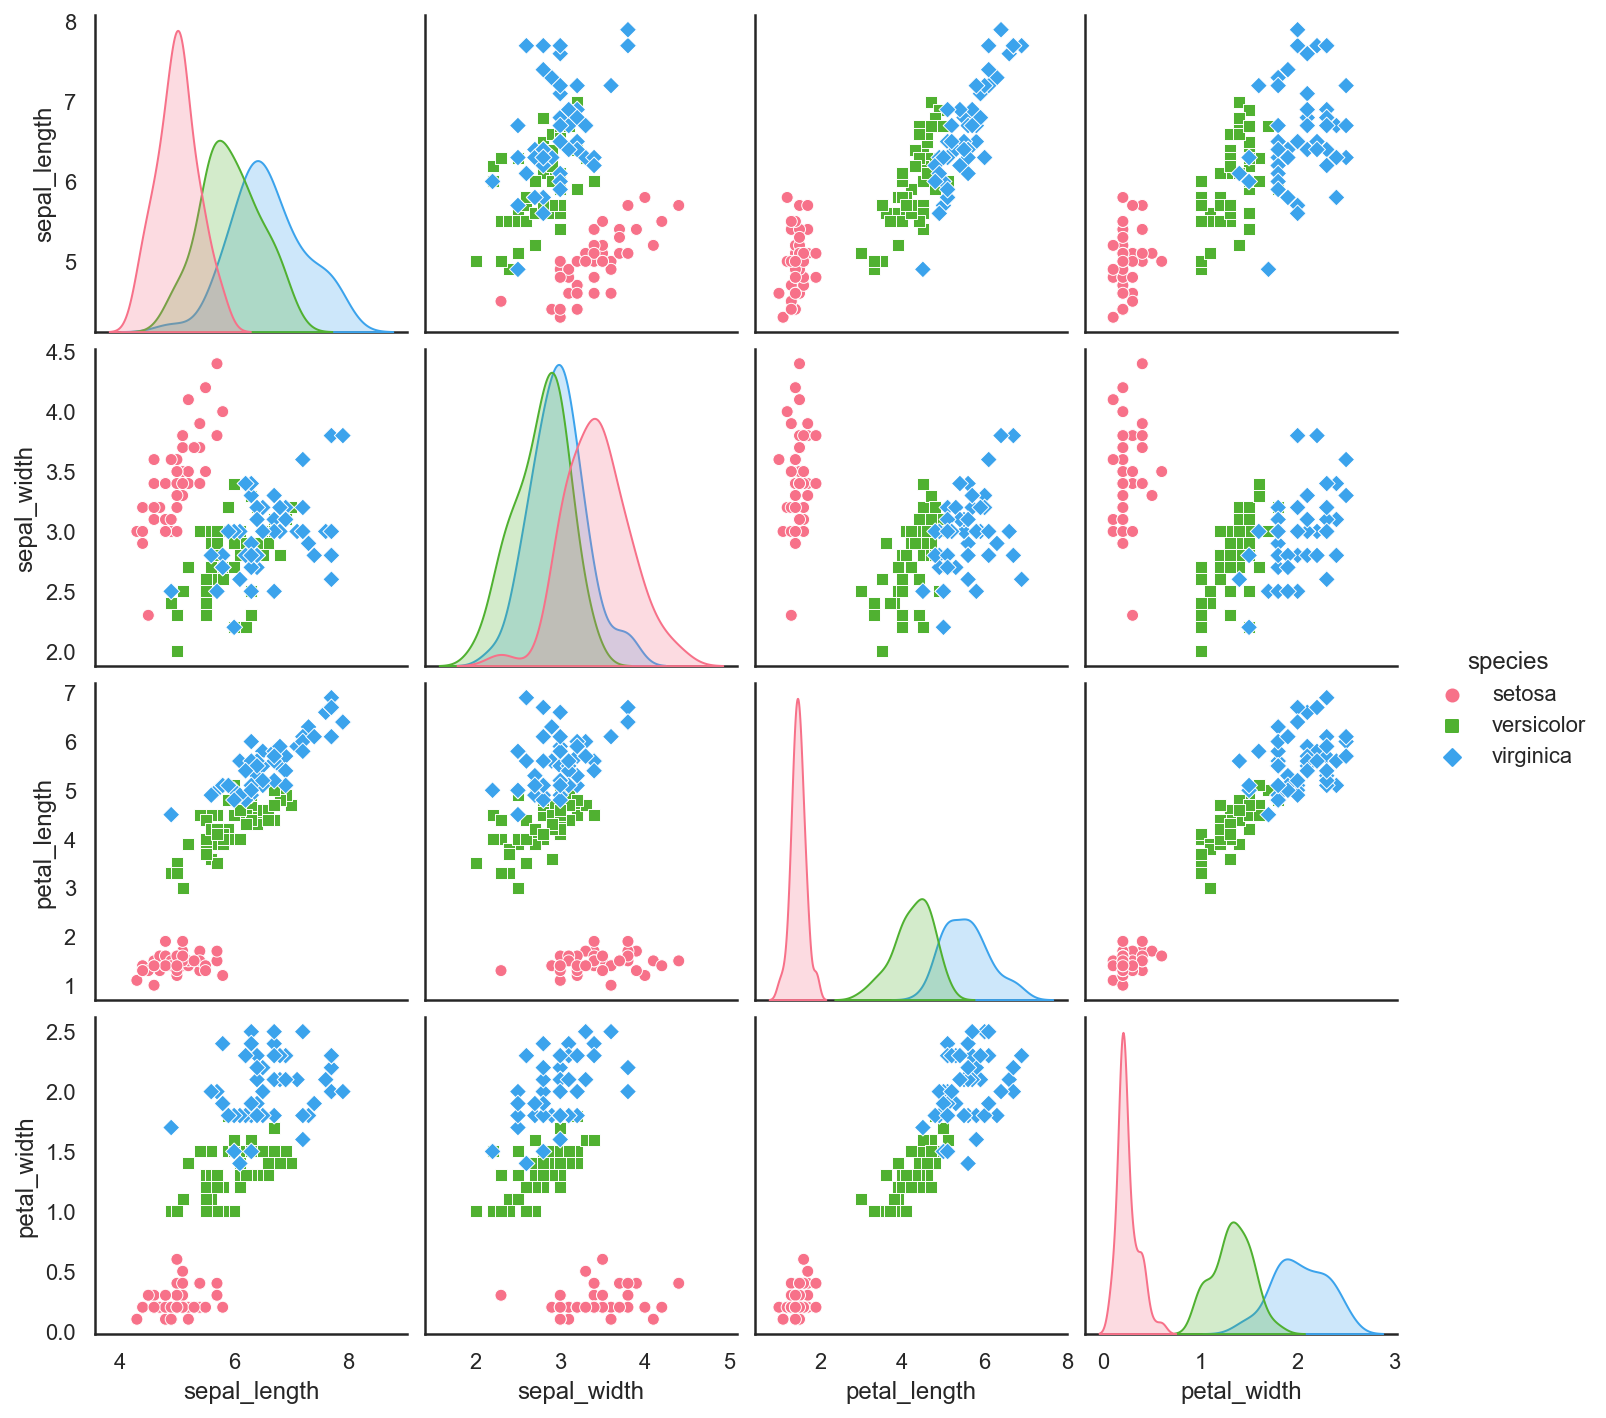

In [47]:
sns.pairplot(data=iris, hue='species', 
             palette='husl', markers=['o','s','D'])

In [48]:
import numpy as np
x = np.random.randn(100)
len(x)

100

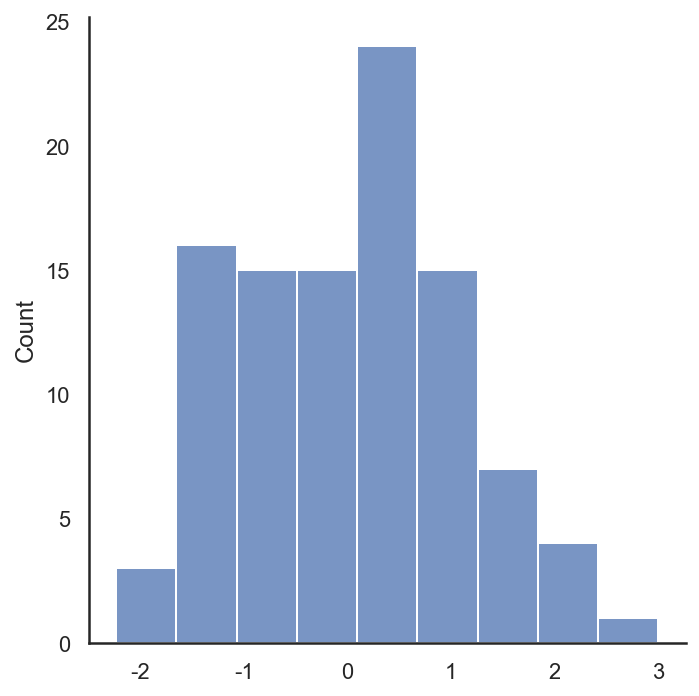

In [49]:
sns.displot(x, kde=False)

### 4) 회귀 그래프

In [50]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


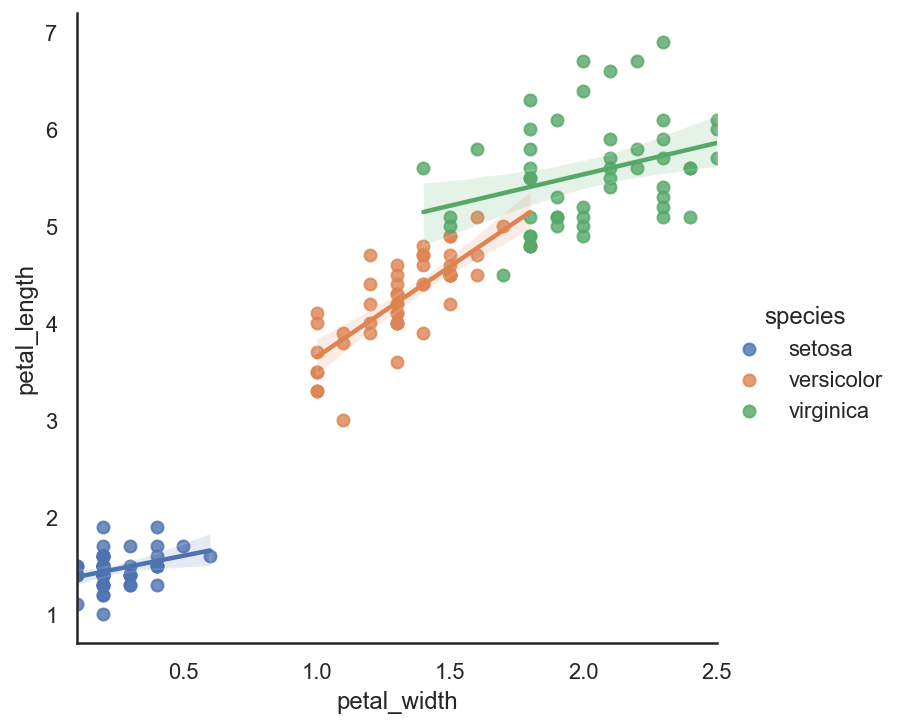

In [51]:
sns.lmplot(x='petal_width', y='petal_length', 
           data=iris, hue='species')

<AxesSubplot:xlabel='petal_width', ylabel='petal_length'>

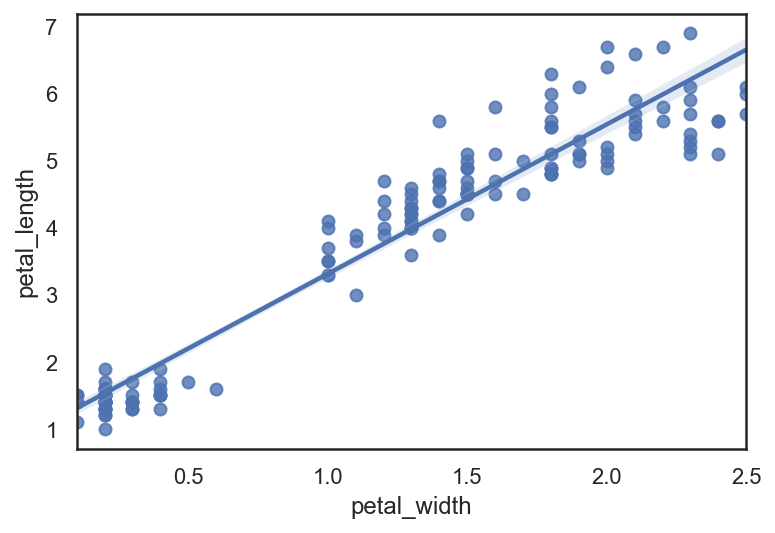

In [52]:
# 회귀모형을 만드는 함수: lmplot, regplot
# regplot은 hue를 사용할 수 없다.
sns.regplot(x='petal_width', y='petal_length', data=iris)

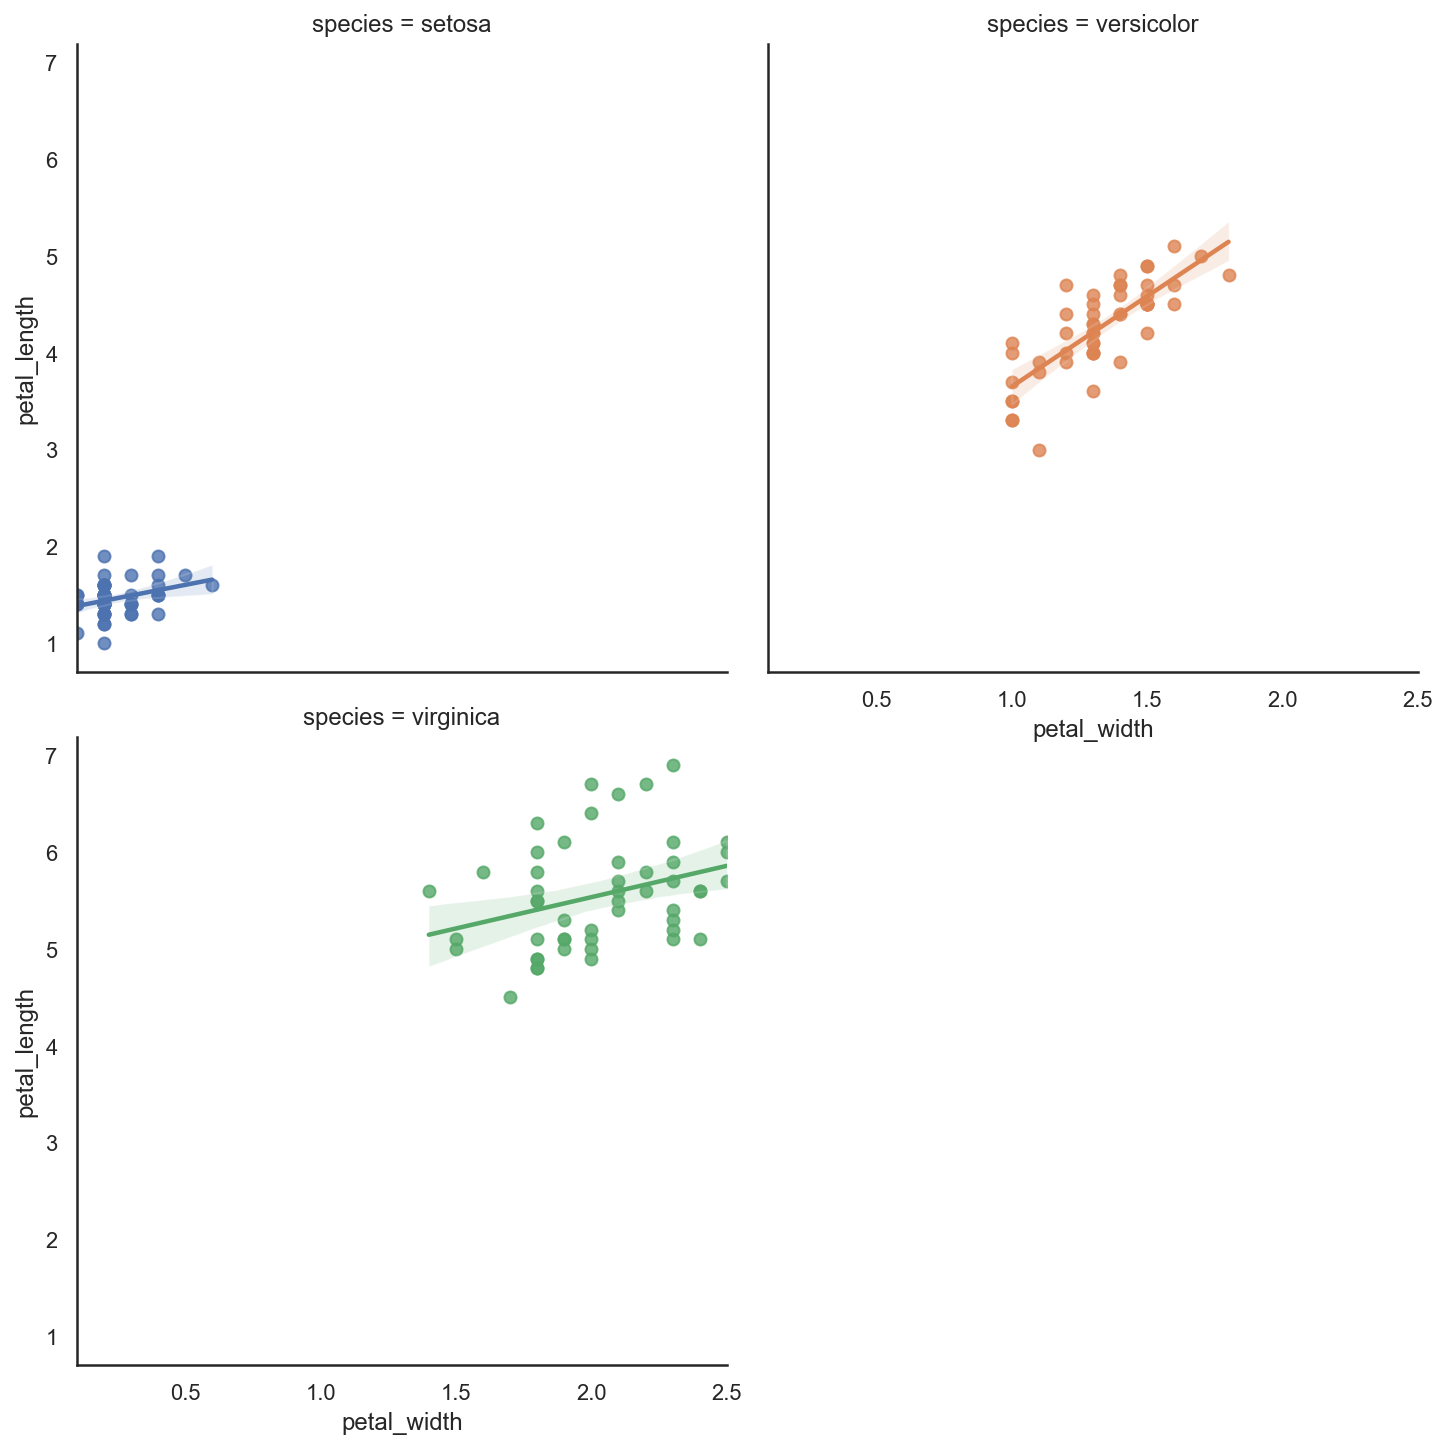

In [53]:
sns.lmplot(x='petal_width', y='petal_length', data=iris,
           hue='species', col='species', col_wrap=2)

### 5) 행렬 그래프

In [54]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

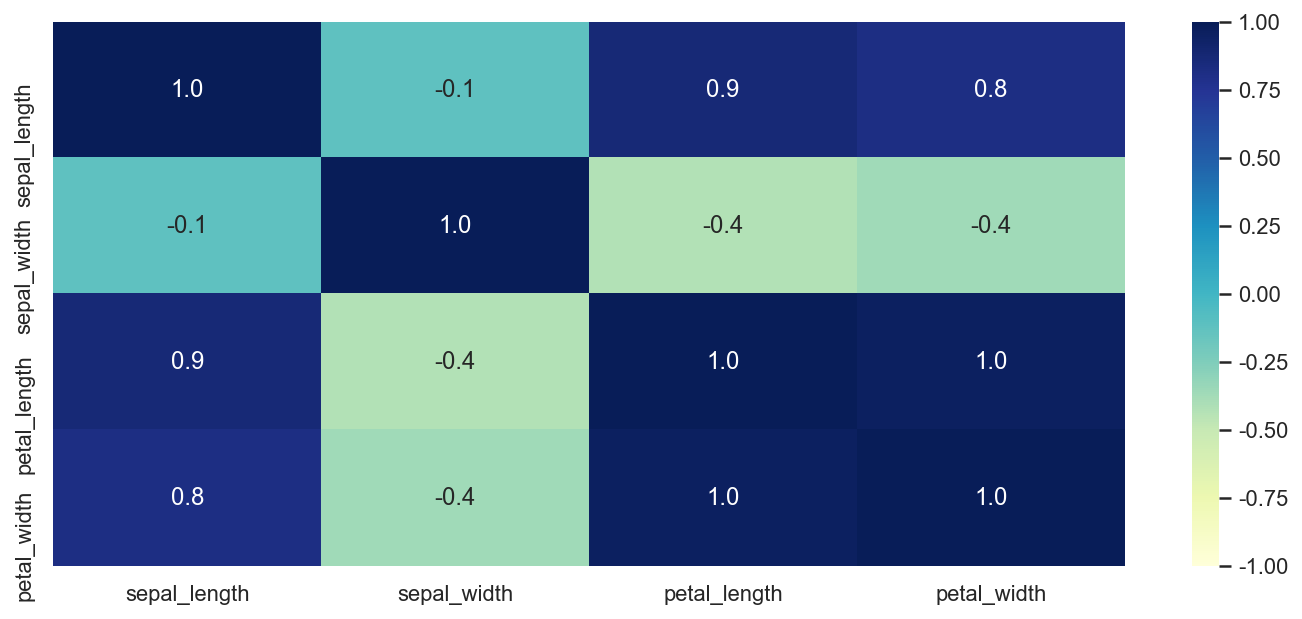

In [55]:
plt.figure(figsize=(12,5))
sns.heatmap(iris.corr(), vmin=-1, annot=True, 
            cmap="YlGnBu", fmt='.1f')

## (4) 다중 그래프를 위한 FacetGrid

https://seaborn.pydata.org/tutorial/axis_grids.html#conditional-small-multiples

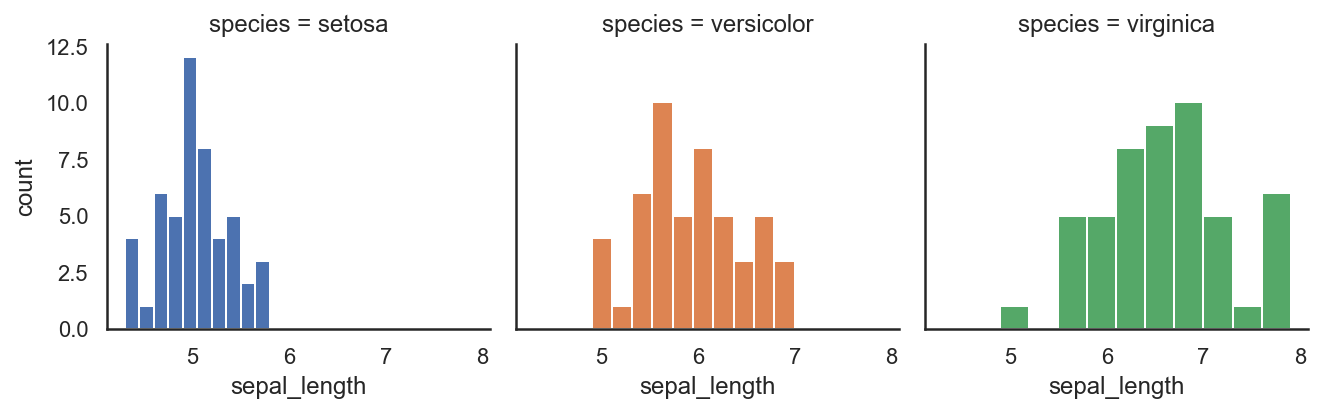

In [56]:
g = sns.FacetGrid(iris, col='species', hue='species')
g.map(plt.hist, 'sepal_length')
g.set_axis_labels(y_var='count')
plt.show()

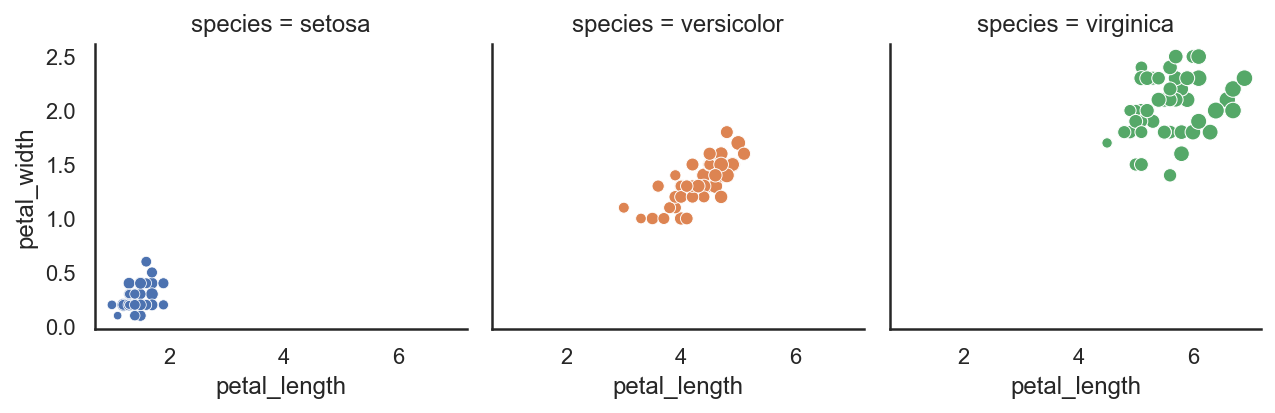

In [58]:
g = sns.FacetGrid(iris, col='species', hue='species')
g.map(sns.scatterplot, 'petal_length', 'petal_width', 
      size=iris.sepal_length)
plt.savefig('data/ch13_2.png')